In [1]:
import numpy as np
from matplotlib import cycler
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [2]:
%matplotlib inline

plt.style.use('seaborn-poster')

# Poisson probability function for discrete events

The Poisson distribution has the following characteristics 
- counts are for rare events
- all events are independent
- the average number of events ($\lambda$) is constant over the period of interest. 

The Poisson probability mass function (PMF) is defined as:

$$f(k;\lambda )= P ( X = k) = {\frac {\lambda ^{k}e^{-\lambda }}{k!}}$$

Where $k$ is the integer number of occurances.

## Poisson statistics

$\lambda$ is a positive, real number and is conveniently equal to the 
expected value, $E(X)$, of the random variable $X$ as well as the variance of $X$:

$$\lambda = E(X) = \sigma^2$$

The standard deviation of a Poisson distribution is simply:

$$\sigma = \sqrt{\lambda}$$

The best estimate for the error if an experiment yeilds a mean count of
$\lambda$, is simply $\sqrt{\lambda}$. 
Measurements are therefore reported as having:

$$\lambda \pm \sqrt{\lambda}$$

i.e. two-thirds of the measurements will fall within 
$\lambda \pm \sqrt{\lambda}$.

## Simulate a Poisson discrete random variable

In [3]:
!pip install simpy

In [4]:
import simpy
import random
import bisect

In [5]:
 ts = []

def simpy_arrival_process(env, rate):  # env is simpy.Environment
    """
    Arrival process, implemented with Simpy in mind
    """
    count = 0  # track number of arrivals
    while True:
        interarrival = random.expovariate(rate)
        # instead of yielding the arrival time, yield a Timeout Event
        yield env.timeout(interarrival)
        count += 1
        # to make things interesting, we add some printouts
        ts.append(env.now)
        #print(f'arrival {count:3d} at time {env.now:5.2f}')

In [6]:
# creates a SimPy Environment
env = simpy.Environment()  

# initializes a new arrival process connected to the Environment
arrivals = simpy_arrival_process(env, 25)  # rate 25

# tell the Environment to process the first arrival Event
env.process(arrivals);

In [7]:
# run the Environment (stopping after t=20)
t = 40

env.run(until=t)

In [8]:
# generate an array of Poisson random variables 
size = len(ts) # experimental acquisition time in seconds
lam = 25 # average number of photons 

d = np.random.poisson(lam = lam, size = size) # number of photons counted 
d.shape

(1007,)

In [9]:
snr = np.sqrt(lam)
error = snr + d
conf = lam+snr + lam-snr
conf

50.0

AttributeError: ignored

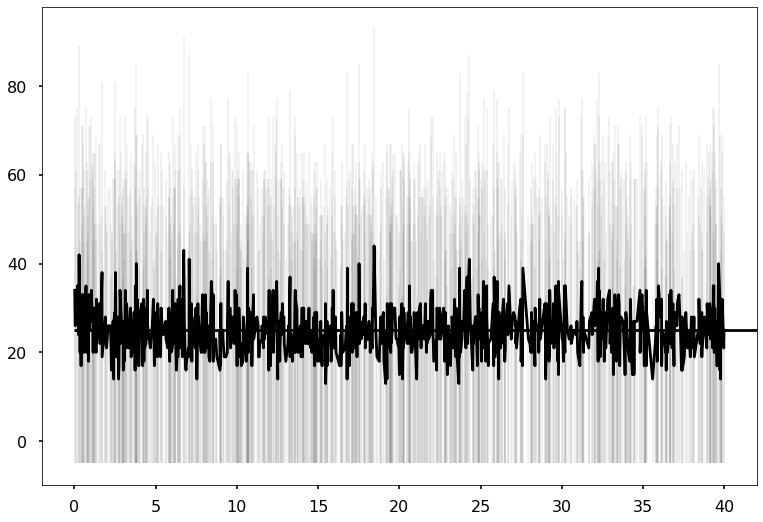

In [11]:
#plt.plot(ts, d, color = 'b', label = f'$\lambda = {lam}$', zorder = 1)
plt.errorbar(x=ts, y=d, yerr=error, color = 'k', elinewidth=0.1, label = 'timestamps', zorder = 1)
plt.hlines(lam, xmin=0, xmax=50, ymin=t, color = 'r', linewidth = conf, alpha = 0.3, zorder = 2, label = '$\lambda \pm \sqrt{\lambda} =$' + f'{lam: .1f} $\pm$ {snr}')
plt.xlim(0, t)
plt.xlabel('time (s)')
plt.ylabel('# photons')
plt.title(f'Photon counting is shot noise limited')
plt.legend();
